***SOUMYADEEP BANIK***<br>
***CS-2***

In [39]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import house_sales_data as hd
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
## Sacramento house price data; load
data = hd.house_sales_data() 
#print(data.price())

## Get the target (i.e., price) and two features
# price = ...
# area = ...
# beds = ...
price = data["price"]
beds = data["beds"]
area = data["area"]
df_house_data = pd.DataFrame({"area1":area, "price1":price}, columns=["area1", "price1"])
x = df_house_data["area1"].values
y = df_house_data["price1"].values

In [34]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate=1.0):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    # now complete ...
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            y_hat = X[i] @ theta     #multiplying the X matrix with theta col. vector i.e x[i][j]*theta[j]
            costs[t] += 1/m * (y_hat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (y_hat - y[i])*X[i,j]
        theta -= learning_rate * grad
    return theta, costs

In [35]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y

In [36]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    return np.sqrt(np.mean(np.square(y-y_hat)))   #RMSE VALUE

In [41]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: not enough values to unpack (expected 6, got 4)

In [22]:
# call gradient descent and fine-tune your learning rate


Text(0, 0.5, 'Cost')

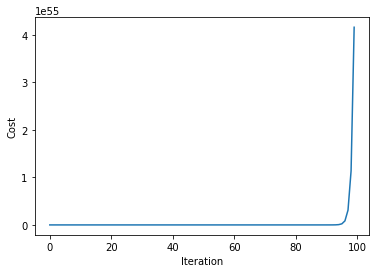

In [38]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
def gradient_descent_cost(iters):
    x_nor = (x - min(x)) / (max(x) - min(x))
    y_nor = (y - min(y)) / (max(y) - min(y))
    cost = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        theta[0] = alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] = alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
        cost.append(np.mean((theta[0] * x_nor + theta[1] - y_nor)**2))
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return np.array(cost)


plt.plot(np.arange(0,100), gradient_descent_cost(100))
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [ ]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

In [47]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [51]:
# Create linear regression object
order = np.random.permutation(len(x))
portion = 20
test_x = x[order[:portion]]
test_y = y[order[:portion]]
train_x = x[order[portion:]]
train_y = y[order[portion:]]
lin_reg=LinearRegression()

In [54]:
# Train the model using the training sets
lin_reg.fit(train_x, train_y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.315 2.214 0.8   1.505 2.142 1.578 1.08  1.45  1.207 1.473 1.416 1.69
 3.468 2.724 0.904 1.337 1.968 0.795 1.202 1.58  1.582 1.531 1.89  1.3
 1.284 2.346 1.188 1.272 1.302 1.462 1.713 1.185 1.058 2.347 3.508 1.69
 0.975 1.638 1.41  2.734 1.993 0.984 1.089 1.609 2.155 2.187 1.811 2.877
 3.984 1.348 1.139 1.174 1.672 2.096 3.863 1.627 1.094 1.605 1.302 1.555
 3.192 1.386 1.022 1.81  1.936 3.433 2.577 2.093 3.173 1.419 1.646 0.81
 1.472 1.739 1.118 1.249 1.25  1.808 1.112 1.08  1.497 0.81  1.939 1.795
 1.206 1.685 1.636 1.543 1.67  1.356 0.844 1.137 0.8   1.074 2.457 2.555
 1.302 1.067 1.01  1.277 1.448 1.32  1.574 2.379 1.83  1.207 1.715 1.566
 1.843 1.12  1.448 1.603 1.326 1.718 1.104 1.52  1.187 1.324 1.012 1.962
 1.367 2.258 1.74  1.511 0.796 1.83  1.714 1.543 1.321 1.401 1.285 1.202
 1.344 1.051 1.093 1.991 1.488 1.65  2.605 1.37  1.011 2.295 0.901 1.229
 1.59  0.966 1.587 2.494 1.616 0.972 3.397 1.265 2.254 1.15  1.843 1.039
 1.159 1.064 1.127 2.359 1.007 1.156 2.875 3.229 2.711 0.958 1.424 1.655
 2.494 1.915 1.12  2.372 1.25  1.522 1.261 3.056 1.953 1.677 0.9   0.96
 3.261 1.17  1.159 1.477 1.34  3.357 1.724 1.162 1.498 0.682 0.99  2.491
 1.12  1.8   0.539 1.503 0.756 1.22  1.152 2.66  1.582 0.861 1.306 1.416
 1.291 1.    1.029 0.876 2.212 1.309 0.804 1.441 1.479 2.28  1.104 1.343
 2.508 1.52  1.1   1.154 2.96  4.303 1.477 1.478 1.276 1.28  1.216 1.169
 1.119 1.12  1.502 1.452 0.722 1.161 1.06  3.389 1.905 1.176 1.638 1.828
 1.451 1.939 2.962 2.354 1.08  1.099 1.567 2.068 1.406 1.41  3.599 1.13
 1.586 1.092 2.159 0.96  1.446 1.212 1.516 3.788 1.981 1.38  1.57  1.182
 1.606 1.892 0.96  1.329 1.253 1.351 1.639 0.61  2.606 1.232 1.735 0.97
 1.596 1.479 3.281 1.172 2.356 1.296 0.779 1.006 1.51  1.16  1.77  1.74
 1.11  1.341 1.591 1.443 0.868 1.58  1.089 0.988 2.462 1.438 0.95  1.289
 1.685 0.904 1.258 3.164 1.317 1.08  2.484 1.24  2.367 3.741 1.331 2.169
 1.235 0.904 1.716 1.32  2.17  0.984 0.911 2.846 3.07  1.876 1.517 2.004
 1.164 1.529 1.329 2.55  1.982 1.485 1.541 2.126 1.436 1.273 2.28  1.211
 1.204 3.615 1.904 2.163 1.669 1.264 1.294 3.579 1.872 1.146 1.032 1.24
 1.43  1.371 0.881 1.463 1.043 1.671 1.376 1.152 2.824 1.475 2.309 3.516
 1.45  1.174 0.888 1.77  1.524 2.11  1.527 0.941 0.962 2.111 2.222 1.039
 1.616 2.053 1.721 1.697 1.953 2.724 1.587 0.967 2.334 1.04  0.796 1.098
 1.316 0.723 2.056 1.418 1.204 1.41  1.082 1.462 1.856 2.185 0.963 1.174
 1.176 1.092 1.188 1.857 1.712 1.255 1.41  0.932 1.401 1.457 1.032 1.917
 1.189 3.134 1.152 1.91  1.116 1.418 1.073 1.31  1.266 1.921 1.851 1.37
 1.199 1.082 1.058 1.955 1.144 1.751 1.338 2.109 0.623 1.362 1.643 1.82
 1.144 2.687 1.577 0.746 1.375 2.79  1.247 1.341 1.838 1.04  1.857 1.653
 0.884 2.274 1.638 0.832 1.36  0.958 0.838 2.494 0.918 1.103 1.816 1.54
 2.787 0.625 1.567 1.269 1.264 0.888 1.915 2.278 1.914 1.305 1.776 1.219
 2.592 1.02  1.695 1.139 2.1   1.727 1.356 1.393 1.516 1.158 0.906 1.457
 1.559 0.78  0.936 0.795 0.924 1.876 2.575 2.725 2.235 1.1   1.72  2.503
 0.964 0.864 1.574 2.581 1.089 1.691 1.    1.266 1.392 2.016 1.104 1.768
 1.253 1.593 1.448 0.901 1.416 0.846 1.12  1.4   1.304 3.838 1.039 2.325
 1.595 1.12  1.362 2.447 1.608 2.169 1.638 1.789 1.42  1.056 0.972 0.952
 1.269 2.109 1.179 1.196 1.659 0.76  1.776 1.65  1.381 2.504 1.265 1.366
 1.439 1.217 1.358 1.456 1.623 1.112 0.93  3.26  2.166 0.933 1.304 1.088
 0.924 2.896 1.28  1.127 1.011 1.232 3.746 1.406 1.477 2.16  1.549 1.39
 1.38  1.258 1.882 1.449 1.108 1.59  1.292 1.132 3.134 1.829 1.248 1.711
 0.97  1.262 1.248 1.94  1.209 2.329 1.354 1.144 1.394 0.888 1.328 1.656
 1.411 1.013 1.351 1.548 1.252 0.994 2.056 2.306 1.888 1.428 0.924 1.32
 1.117 1.188 1.115 1.512 1.319 1.427 0.834 1.758 1.601 1.637 0.722 2.484
 1.407 2.789 1.598 0.795 1.124 1.075 0.795 1.12  1.483 1.621 1.799 1.051
 1.177 1.506 1.961 2.054 1.766 1.193 2.367 1.287 1.146 2.175 2.258 1.127
 1.52  3.992 1.289 1.245 1.269 3.881 1.922 1.08  1.466 1.262 1.436 2.002
 1.093 0.998 1.14  1.26  1.231 1.801 1.887 1.452 1.628 1.004 1.468 0.99
 1.358 2.136 2.218 1.44  0.956 1.928 1.12  2.846 2.607 1.134 0.611 1.373
 1.354 1.36  2.372 1.9   0.696 2.085 1.844 1.851 1.595 1.115 3.037 2.03
 1.183 1.28  1.678 1.327 2.724 1.45  2.992 1.428 1.364 2.442 0.84  1.353
 1.216 1.596 1.329 2.8   1.126 1.676 0.795 2.161 0.909 1.715 1.039 3.44
 1.871 1.899 1.392 1.123 3.44  1.009 1.788 2.199 2.205 4.246 2.052 2.212
 1.175 1.157 1.676 0.588 2.172 3.076 2.307 1.358 1.039 0.904 1.139 1.382
 0.836 1.41  1.683 1.465 1.871 1.736 1.328 1.578 1.513 1.144 1.082 1.8
 0.722 1.8   0.957 2.049 1.686 1.05  1.456 1.59  2.652 1.555].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Predict on test set and print evaluation metric
# How much does it differ by from 